<a href="https://colab.research.google.com/github/pSN0W/AI_Practice/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Modules

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#Data

In [3]:
data = load_boston()

In [5]:
data.data.shape

(506, 13)

In [12]:
data.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [14]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
feature = list(data.feature_names)
boston = pd.DataFrame(data=data.data,columns=feature)

In [18]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [19]:
boston['Price'] = data.target

In [20]:
boston.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


In [21]:
X=boston.drop('Price',axis=1)
Y=boston['Price']

#Linear Regression Model

In [22]:
#Splitting The Dataset

X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [23]:
#Linear Regression Model

lr = LinearRegression()
lr.fit(X_train,Y_train)

#Predicting on Test
pred = lr.predict(X_test)

#Plotting 

##Scatter plot of predicted and actual

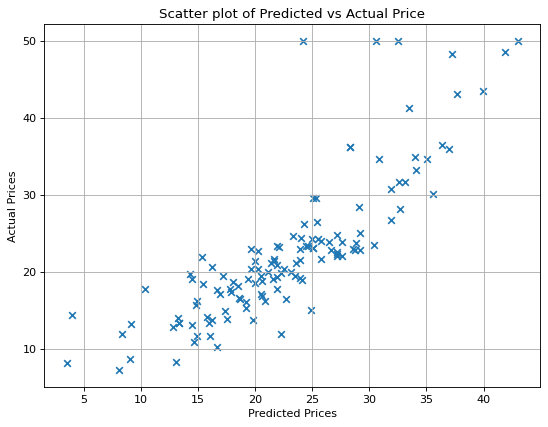

In [25]:
plt.figure(figsize=[8,6],dpi=80)
plt.scatter(pred,Y_test,marker='x')
plt.xlabel("Predicted Prices")
plt.ylabel("Actual Prices")
plt.title("Scatter plot of Predicted vs Actual Price")
plt.grid()

##Plotting Distribution of error

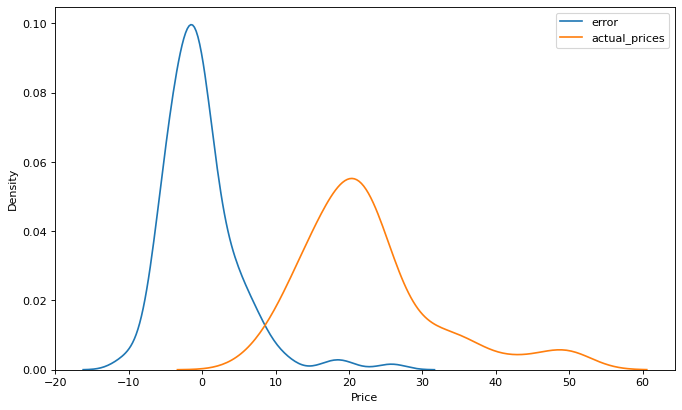

In [40]:
err = Y_test-pred
plt.figure(figsize=[10,6],dpi=80)
sns.kdeplot(err,label='error')
sns.kdeplot(Y_test,label='actual_prices')
plt.legend()

#Error on actual data

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'error on different actual prices')

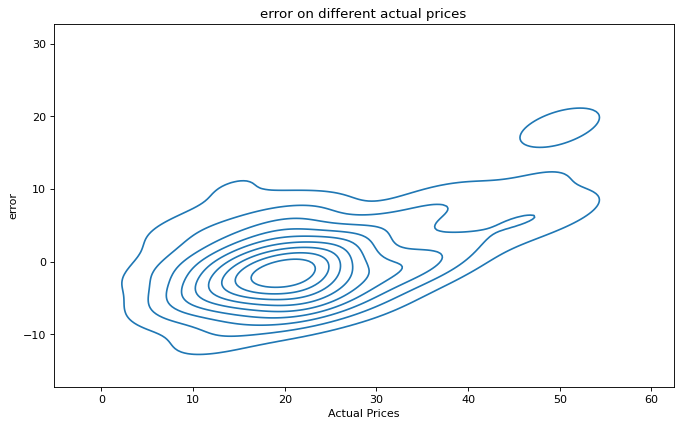

In [43]:
plt.figure(figsize=[10,6],dpi=80)
sns.kdeplot(Y_test,err)
plt.xlabel("Actual Prices")
plt.ylabel("error")
plt.title("error on different actual prices")

Text(0.5, 1.0, 'error on different actual prices')

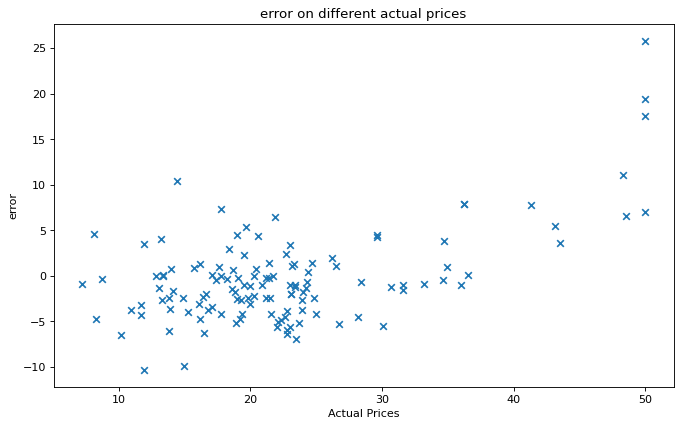

In [44]:
plt.figure(figsize=[10,6],dpi=80)
plt.scatter(Y_test,err,marker='x')
plt.xlabel("Actual Prices")
plt.ylabel("error")
plt.title("error on different actual prices")